# MNIST Digit Classification
##### In this assignment, you will work with the [MNIST handwritten digits dataset](http://yann.lecun.com/exdb/mnist/) to implement and compare two supervised learning algorithms: Logistic Regression and Neural Networks. You will gain hands-on experience with data preprocessing, model training, evaluation, and visualization techniques commonly used in machine learning.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    from sklearn.datasets import fetch_openml
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    from sklearn.neural_network import MLPClassifier
    import seaborn as sns
except ImportError as e:
    import subprocess
    import sys
    
    print(f"Missing package: {str(e).split()[-1]}")
    print("Installing required packages...")
    %pip install scikit-learn
    %pip install seaborn


### Part 1: Data Loading and Exploration (4 points)
1. Load the MNIST dataset using fetch_openml
2. Print the following dataset characteristics:
   - Dataset dimensions and size
   - Number of classes
3. Visualize sample digits from the dataset


In [ ]:
#Provide your code for part 1-1 here
# Part 1-1: Load the MNIST dataset and print dataset characteristics

from sklearn.datasets import fetch_openml

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Extract data and target
X, y = mnist.data, mnist.target


Dataset dimensions: (70000, 784)
Dataset size: 54880000
Number of classes: 10


In [ ]:
#Provide your code for part 1-2 here

# Print dataset characteristics
print(f"Dataset dimensions: {X.shape}")
print(f"Dataset size: {X.size}")
print(f"Number of classes: {len(set(y))}")

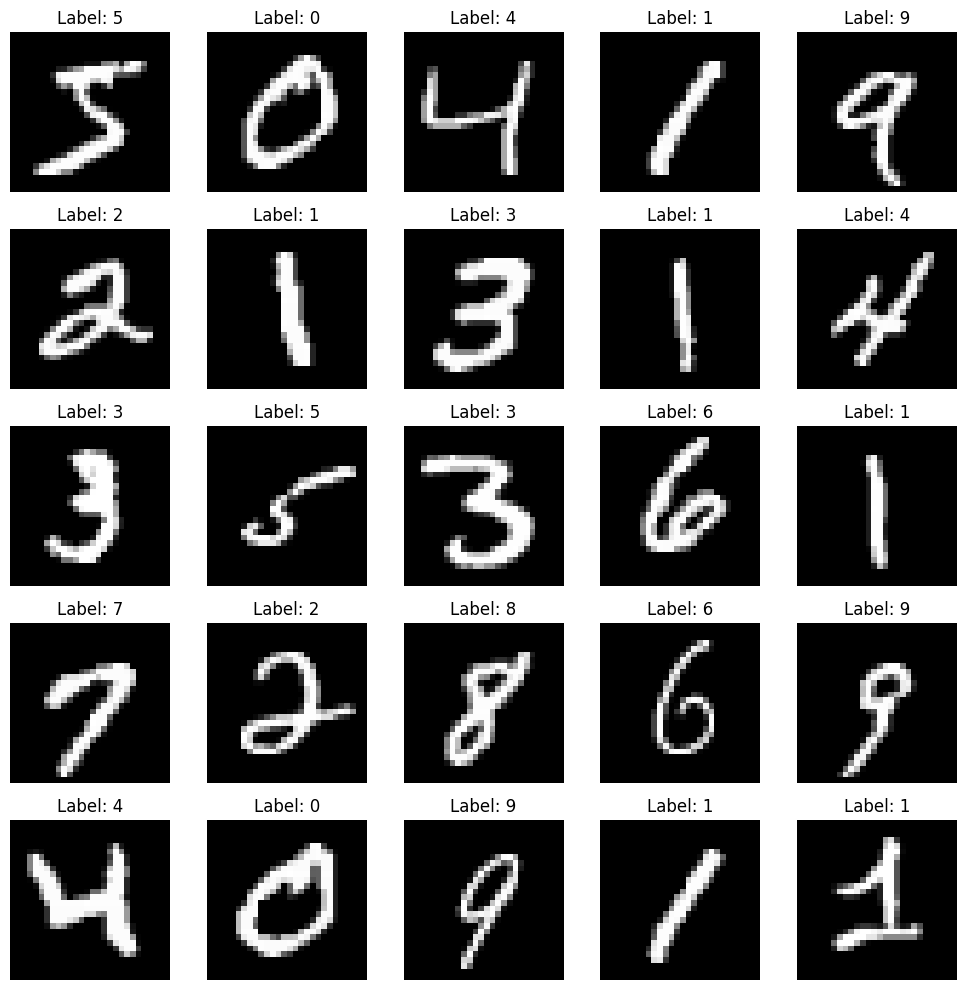

In [3]:
#Provide your code for part 1-3 here
# Part 1-3: Visualize sample digits from the dataset

import matplotlib.pyplot as plt

# Convert target labels to integers for visualization
y = y.astype(int)

# Plot a grid of 5x5 sample digits
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
axes = axes.ravel()

for i in range(25):
    axes[i].imshow(X[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Label: {y[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### Part 2: Data Preprocessing (4 points)
1. Scale the pixel values to range [0,1] by dividing by 255
2. Split the data into training (80%) and testing (20%) sets
3. Create a StandardScaler object and fit it on the training data
4. Transform both training and test data using the fitted scaler
5. Print the shapes of the resulting training and test sets


In [5]:
# Provide your code for part 2 here
# Scale the pixel values
X = X / 255.0

# Verify the scaling
print(f"Scaled pixel values range: min={X.min()}, max={X.max()}")

# Part 2-2: Split the data into training and testing sets

from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, Testing labels shape: {y_test.shape}")


from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform both training and test data using the fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print confirmation
print("StandardScaler fitted and data transformed.")

# Print the shapes of the training and test datasets
print(f"Training data shape: {X_train_scaled.shape}, Training labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test_scaled.shape}, Testing labels shape: {y_test.shape}")

Scaled pixel values range: min=0.0, max=0.00392156862745098
Training data shape: (56000, 784), Training labels shape: (56000,)
Testing data shape: (14000, 784), Testing labels shape: (14000,)
StandardScaler fitted and data transformed.
Training data shape: (56000, 784), Training labels shape: (56000,)
Testing data shape: (14000, 784), Testing labels shape: (14000,)


### Part 3: Model Training and Evaluation (8 points)
1. Train a Logistic Regression model using the training data. Use the default parameters.
2. Train a Neural Network model using the training data. The neural network should have 2 hidden layers with 100 and 50 neurons respectively. Use the Adam optimizer and a learning rate of 0.001.

In [6]:
# Provide your code for part 3-1 here
# Part 3-1: Train a Logistic Regression model using the training data

from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the scaled training data
logistic_model.fit(X_train_scaled, y_train)

# Print confirmation
print("Logistic Regression model trained successfully.")



Logistic Regression model trained successfully.


In [8]:
# Provide your code for part 3-2 here
# Part 3-2: Train a Neural Network model using the training data

from sklearn.neural_network import MLPClassifier

# Create a Neural Network model with 2 hidden layers (100 and 50 neurons)
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), solver='adam', learning_rate_init=0.001, max_iter=200, random_state=42)

# Train the model on the scaled training data
nn_model.fit(X_train_scaled, y_train)

# Print confirmation
print("Neural Network model trained successfully.")

Neural Network model trained successfully.


### Part 4: Model Comparison and Visualization (4 points)
1. Use a bar plot to compare the accuracy of both models on the test data
2. Print the classification report and confusion matrix for both models
3. Visualize the misclassified examples for both models


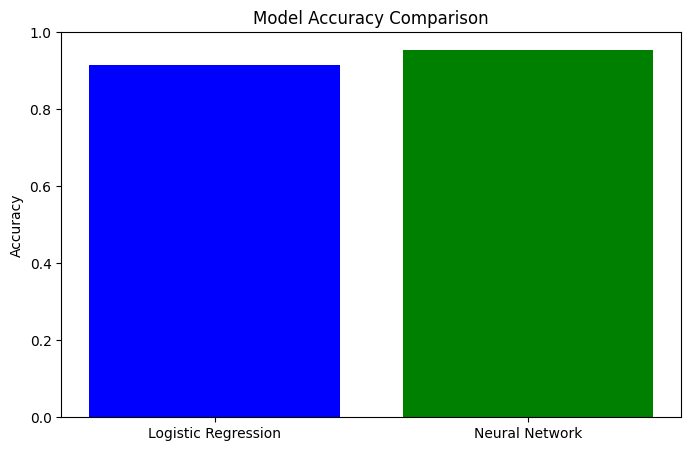

In [9]:
# Provide your code for part 4-1 here
# Part 4-1: Use a bar plot to compare the accuracy of both models on the test data

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Predict the test data using both models
logistic_pred = logistic_model.predict(X_test_scaled)
nn_pred = nn_model.predict(X_test_scaled)

# Calculate the accuracy for both models
logistic_accuracy = accuracy_score(y_test, logistic_pred)
nn_accuracy = accuracy_score(y_test, nn_pred)

# Create a bar plot to compare the accuracies
models = ['Logistic Regression', 'Neural Network']
accuracies = [logistic_accuracy, nn_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

In [10]:
# Provide your code for part 4-2 here
# Part 4-2: Print the classification report and confusion matrix for both models

from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression model evaluation
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_pred))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, logistic_pred))

# Neural Network model evaluation
print("\nNeural Network Classification Report:")
print(classification_report(y_test, nn_pred))
print("Neural Network Confusion Matrix:")
print(confusion_matrix(y_test, nn_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.90      0.89      0.90      1380
           3       0.90      0.89      0.90      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.93      0.94      0.94      1396
           7       0.92      0.94      0.93      1503
           8       0.90      0.86      0.88      1357
           9       0.89      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.92      0.92      0.92     14000

Logistic Regression Confusion Matrix:
[[1283    1   10    0    1   14   22    4    6    2]
 [   0 1555    6    9    3    5    1    4   14    3]
 [   5   18 1235   18   13   14   21   16   28   12]
 

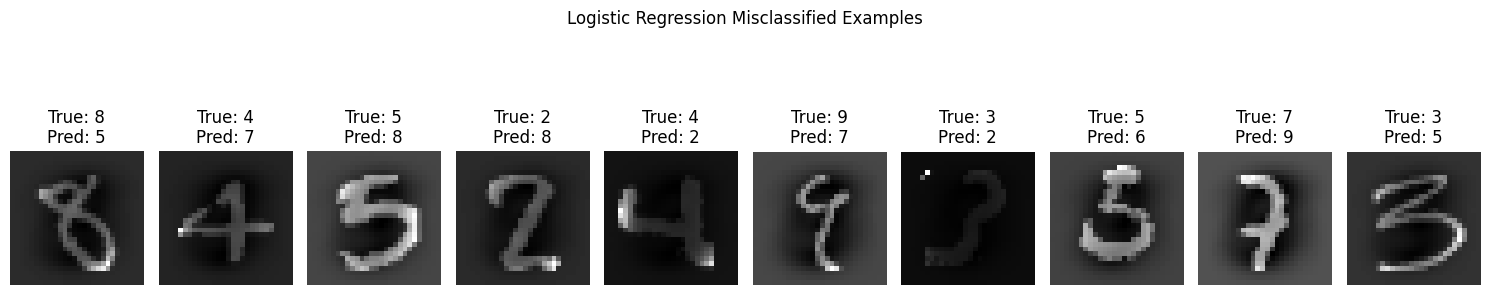

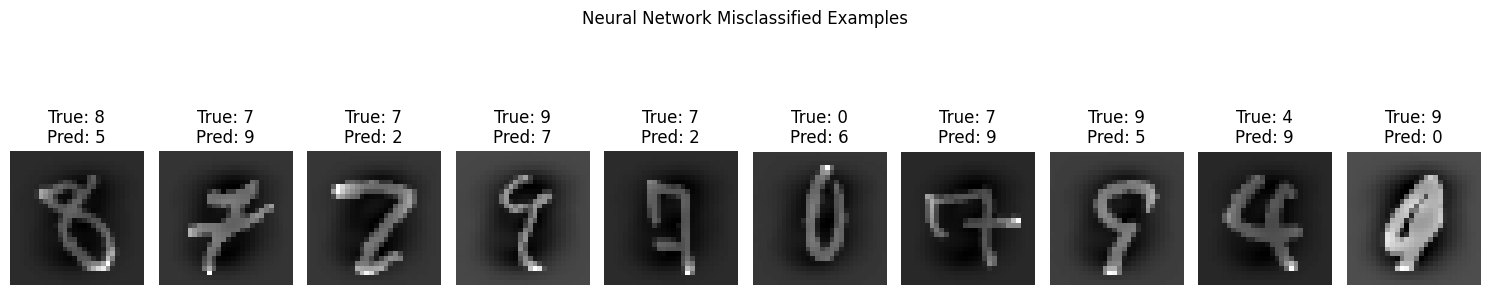

In [12]:
# Provide your code for part 4-3 here
def plot_misclassified_examples(model, X_test, y_test, title):
    predictions = model.predict(X_test)
    misclassified_indices = np.where(predictions != y_test)[0]
   
    # Plot the first 10 misclassified examples
    fig, axes = plt.subplots(1, 10, figsize=(15, 4))
    for i, ax in enumerate(axes):
        if i < len(misclassified_indices):
            index = misclassified_indices[i]
            ax.imshow(X_test[index].reshape(28, 28), cmap='gray')
            ax.set_title(f"True: {y_test[index]}\nPred: {predictions[index]}")
            ax.axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
# Plot misclassified examples for Logistic Regression
plot_misclassified_examples(logistic_model, X_test_scaled, y_test, "Logistic Regression Misclassified Examples")

# Plot misclassified examples for Neural Network
plot_misclassified_examples(nn_model, X_test_scaled, y_test, "Neural Network Misclassified Examples")



